In [31]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [32]:
import utils

In [33]:
import numpy as np
import random
features = np.array(
    [
        [1, 0],
        [0, 2],
        [1, 1],
        [1, 2],
        [1, 3],
        [2, 2],
        [2, 3],
        [3, 2]
    ]
)
labels = np.array(
    [0, 0, 0, 0, 1, 1, 1, 1]
)


def sigmoid(x):
    return np.exp(x)/(1 + np.exp(x))


def score(weights, bias, features):
    return np.dot(weights, features) + bias


def prediction(weights, bias, features):
    return sigmoid(score(weights, bias, features))

# formula for log loss
# log loss = -y * ln(y') - (1 - y) ln(1 - y)


def log_loss(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    return -label * np.log(pred) - (1-label) * np.log(1-pred)


def total_log_loss(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error


def logistic_trick(weights, bias, features, label, learning_rate=0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        feature_i = features[i]
        weights[i] += (label - pred) * feature_i * learning_rate
        bias += (label - pred) * learning_rate
    return weights, bias


def logistic_regression(features, labels, learning_rate=0.01, epochs=1000):
    utils.plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        errors.append(total_log_loss(weights, bias, features, labels))

        # randomly select a label and a feature
        random_index = random.randint(0, len(features) - 1)
        random_feature = features[random_index]
        random_label = labels[random_index]

        weights, bias = logistic_trick(
            weights, bias, random_feature, random_label, learning_rate)
    return weights, bias

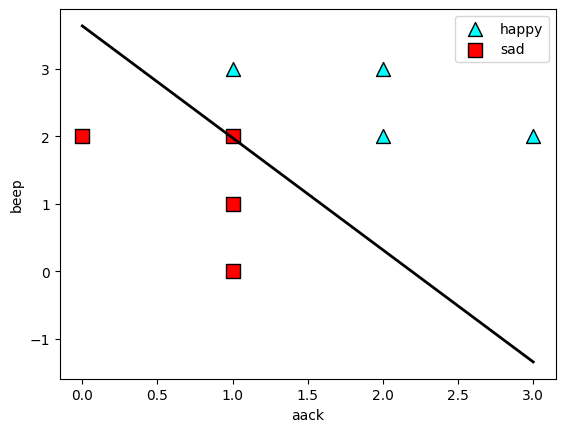

In [44]:
weights, bias = logistic_regression(features, labels)
a = weights[0]
b = weights[1]
c = bias
utils.draw_line(a, b, c)


In [35]:
import turicreate as tc
movies = tc.SFrame('IMDB_Dataset.csv')
movies['words'] = tc.text_analytics.count_words(movies['review'])

model = tc.logistic_classifier.create(movies, features=['words'], target='sentiment')
model.coefficients


Finished parsing file /home/ubuntu/grokkingmachinelearning/IMDB_Dataset.csv

Parsing completed. Parsed 100 lines in 0.213641 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 39624 lines. Lines per second: 117053

Finished parsing file /home/ubuntu/grokkingmachinelearning/IMDB_Dataset.csv

Parsing completed. Parsed 50000 lines in 0.396218 secs.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 47500

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 101843

Number of coefficients      : 101844

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.154060     | 0.917326          | 0.856400            |

| 1         | 4        | 1.000000  | 0.278981     | 0.939958          | 0.862800            |

| 2         | 6        | 0.837855  | 0.399817     | 0.971474          | 0.893600            |

| 3         | 7        | 1.000000  | 0.484331     | 0.980042          | 0.899200            |

| 4         | 8        | 1.000000  | 0.576968     | 0.987179          | 0.903600            |

| 9         | 13       | 1.000000  | 1.008674     | 0.999684          | 0.877200            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

name,index,class,value,stderr
(intercept),None,positive,0.12386796751211071,None
words,darker,positive,0.5510589231985,None
words,touch,positive,0.20830008354686988,None
words,thats,positive,-0.4658444638029298,None
words,your,positive,-0.019654334689209397,None
words,viewing,positive,0.10272382942533444,None
words,their,positive,0.00758310340427383,None
words,into,positive,-0.006225691572922391,None
words,turned,positive,-0.18587497138293455,None
words,being,positive,-0.015099321136843383,None


In [36]:
movies['predictions'] = model.predict(movies, output_type='probability')
movies.sort('predictions')[-1]

{'review': "This is an Oriental fantasy about ¨thousand and one Arabian nights¨ plenty of incredible adventures, fantasy witchery and wizardly. The malignant vizier Jaffar (magnificently played by Conrad Veidt)with powerful magic faculties imprisons the prince Ahamad of Bagdad(attractive John Justin)who loses his throne, then he escapes thanks a little thief named Abu(sympathetic Sabu). They arrive Basora where Ahamad and the princess(gorgeous June Duprez) fall in love. But prince and thief are haunted by Jaffar , Ahamd is turned blind and Abu is become a dog. The story accumulates several fantastic ingredients such as transformation of the starring, a flying mechanic horse, magic bow, flying carpet and of course the colossal genie(overacting performed by Rex Ingram) who gives three wishes to Sabu , the magic eye, the figure of goddess Kali with several hands, among others.<br /><br />This remarkable picture ranks as one of the finest fantastic films of all time. Produced by London Fim

In [37]:
movies.sort('predictions')[0]

{'review': "Even duller, if possible, than the original (I hope I may say that under the IMDb guidelines). THE FRENCH CONNECTION at least tried to absorb European influences, to complicate the conventional view of the American police detective, even if the attempt was foundered by Friedkin's ambivalence, Americaness and general indirection. The (relative) arthouse boom of the 1960s (especially with the nouvelle vague) allowed for a huge influence of European cinema in Hollywood. This lent a new vigour and complexity to a weary medium, and, in the best of them (eg BONNIE AND CLYDE, early Scorcese), a new subversion of received practice. The original CONNECTION was part of this movement, with its difficultly distanced style, and anti-detective figure. TWO is old Hollywood's right-wing reassertion of American values.<br /><br />This is figured in the film's very tiresome America vs France dialectic. For instance, TWO is shot like a 70s French policier. It was the French, of course, who in

In [38]:
# Dentist logistic classifier
# Given: model = d + 0.5c - 0.8
# d -> indicates if patient has had decayed tooth in the past
# c -> indicates if patient eats candy
# c = 0 indicates paties does not eat candy
# c = 1 indicates patient eats candy
# d = 0 indicates patient did not have tooth decay treatment in the pst
# d = 1 indicates patient had tooth decay treatment in the past
# Problem: What is the probability if a patient having tooth decay if she ate candy and was treated
# tooth decay in the past?
# Solution:
# ate candy = c = 1
# tooth decay treatment in the past = d = 1
# score = w1*x1 + w2*x2 + ... + wn*xn + bias
# d = x1
# c = x2
# w1 = 1
# w2 = 0.5
# bias = -0.8
# score = 1*d + 0.5*c + (-0.8)
# score = d + 0.5*c - 0.8
# score = 1 + 0.5*1 - 0.8
# score = 0.7
# probability = sigmoid(score)

print(f'The probability of the patient of having tooth decay is: {sigmoid(1 + 0.5 * 1 - 0.8)}')

The probability of the patient of having tooth decay is: 0.6681877721681662


In [52]:
import math
# Given:
# prediction = sigmoid(2x1 + 3x2 - 4)
# x1=1,x2=1 or point(1,1) gives prediction of 0

# 1. Calculate the prediction that the model gives to the point p
# p = (1, 1)
point_1_1_prediction = sigmoid(2*1 + 3*1 - 4)
print(f'Prediction for (1,1) is {point_1_1_prediction}')

# 2. Calculate the log loss of the model produces at point p
# log loss = -label * ln(pred) - (1-label) * ln(1-pred)
old_log_loss = -1 * math.log(point_1_1_prediction) - (1 - 1) * math.log(1 - point_1_1_prediction)
print(f'Log loss for (1,1) with label 1 is { old_log_loss }')

# 3. Use the logistic trick to obtain a new model that produces a smaller log loss.
# You can use n = 0.1 as the learning rate.
# logistic trick
# wi^ += (label - pred) * xi * learning_rate
# bias^ += (label - pred) * learning_rate
# model = 2x1 + 3x2 - 4
n = 0.1
w1 = 2
w2 = 3
bias = -4
print(f'Before logistic trick w1={w1} w2={w2} bias={bias}')

w1 += (1 - point_1_1_prediction) * 1 * n
w2 += (1 - point_1_1_prediction) * 1 * n
bias += (1 - point_1_1_prediction) * n

print(f'After logistic trick w1={w1} w2={w2} bias={bias}')

# 4. Find the prediction given by the new model at the point p, and verify that the log loss obtained is smaller than the original
# Point(1,1) so x1 = 1, x2=1
x1 = 1
x2 = 1
label = 1
point_1_1_prediction_new = sigmoid(w1*x1 + w2*x2 + bias)
new_log_loss = -label * math.log(point_1_1_prediction_new) - (1 - label) * math.log(1 - point_1_1_prediction_new)

print(f'Prediction for (1,1) after logistical trick is {point_1_1_prediction_new}')
print(f'Log loss for (1,1) with label 1 after logistical trick is {new_log_loss}')
print(f'Did log log loss decrease? True or False: {new_log_loss < old_log_loss}')

Prediction for (1,1) is 0.7310585786300049
Log loss for (1,1) with label 1 is 0.3132616875182228
Before logistic trick w1=2 w2=3 bias=-4
After logistic trick w1=2.0268941421369995 w2=3.0268941421369995 bias=-3.9731058578630005
Prediction for (1,1) after logistical trick is 0.7466231044754239
Log loss for (1,1) with label 1 after logistical trick is 0.29219476672354916
Did log log loss decrease? True or False: True


In [56]:
# Using the updated model above, find a point for which the prediction is 0.8
# y^ = sigmoid(score)
# sigmoid(score) = 1 / 1 + e ** -score
# y^ = 1 / 1 + e ** -score
# (1 + e ** -score) * y^ = 1
# y^ + y^e**-score = 1
# y^e**-score = 1 - y^
# e**-score = 1 - y^ / y^
# ln(e ** a) = a
# ln(e**-score) = ln( 1 - y^ / y^)
# -score = ln(1 - y^ / y^)
# score = -ln(1 - y^ / y^)
# -ln(a) = ln(1 / a)
# score = ln( 1 / 1 - y^ / y^)
# score = ln(y^ / 1 - y^)

score_with_point_8_prediction = math.log(0.8 / (1 - 0.8))
print(f'The score for 0.8 prediction is: {score_with_point_8_prediction}')

# Given that score = w1x1 + w2x2 + bias
# x1 = (score - w2x2 - bias) / w1
# x2 = (score - w1x1 - bias) / w2

print(f'If x2 = 1, then x1 will be { (score_with_point_8_prediction - w2 * 1 - bias) / w1}')
print(f'If x1 = 1, then x2 will be { (score_with_point_8_prediction - w1 * 1 - bias) / w2}')

The score for 0.8 prediction is: 1.3862943611198908
If x2 = 1, then x1 will be 1.1507784389700189
If x1 = 1, then x2 will be 1.1009655179064601
